This notebook explores probability density functions and power spectrum.

In [1]:
import numpy as np
from scipy import stats
from scipy import signal
from numpy import fft
import matplotlib.pyplot as plt
%matplotlib inline

Let's try some simple experiments for the power spectrum from the scipy documentation

In [2]:
fs = 10e3                      # This is the sampling frequency at 10 kHz Remember, Hz = 1/s.
                               # This means we take a measurement once every 10e3 times per second
N = 1e5                        # This is the number of data points we have
amp = 2*np.sqrt(2)             # This is the  amplitude of the main signal
freq = 1234.0                  # This is the main frequency of the signal we construct
noise_power = 0.001 * fs / 2               # This looks like the amplitude of the noise
time = np.arange(N) / fs                   # This is the time sample: Nsamples / fs samples every second = T total time
data = amp*np.sin(2*np.pi*freq*time)       # This is the time series of measurement values
data += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)    # Here we add on the noise


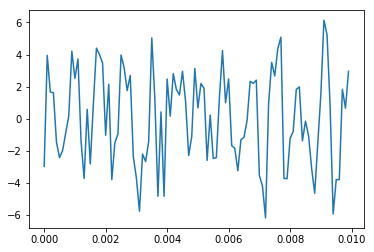

In [3]:
plt.plot(time[0:100],data[0:100])

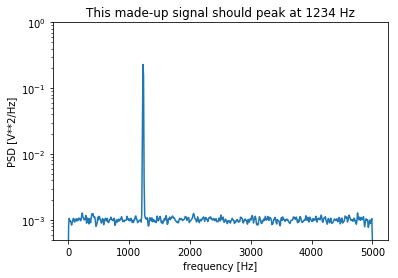

In [4]:
#
# This cell not only calls the welch windowing time series functions, it plots the answer.
# Because we invented a time series that had a srong peak at 1234 Hz, we better see this
# frequency dominate in the power spectrum -- which we do.
#

f, Pxx_den = signal.welch(data, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.title('This made-up signal should peak at 1234 Hz')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


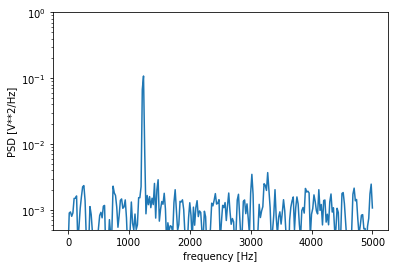

In [5]:
#
# In this jupyter cell I experimenet with the parameter nperseg for the size of the windows. 
# In this case the decreased windowing size shows more noise in the signal.
#

fshort, Pxx_den_short = signal.welch(data[0:1000], fs, nperseg=500)
plt.semilogy(fshort, Pxx_den_short)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

I'd like to try this with a regular sine wave!

In [6]:
#
# In this cell I explore whether or not I really understand the data by 
# creating my own time series that should just give me a sine wave -- a single peak at once per total time.
#
# In this case I know the end time and that I have data every X seconds.

TapT = 10         #  total time in seconds
ds   = .1         # We have a data point every .1 seconds.
fs    = 1/ds      # The dt converts to Hertz  as 1 data point every .1 second = 10 Hz.
Ns   = np.int(TapT*fs)    # represented by Ns points
Ttime = np.arange(Ns) / fs  
print(fs,Ns)
print(Ttime)

10.0 100
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


In [7]:
#
# I also think this would be an interesting function to explore
#

def MakeData(k,t):
    X = 1.
    data = np.zeros(len(t))
    for i in range(len(t)):
        data[i]=X*np.cos(np.sqrt(k/t[i])*t[i])
    return data

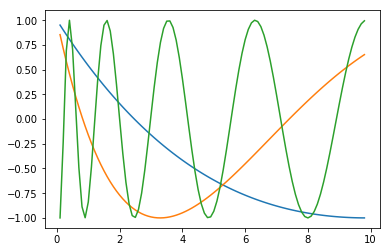

In [8]:
plt.figure()
plt.plot(Ttime[1:Ns-1],MakeData(1,Ttime[1:Ns-1]))
plt.plot(Ttime[1:Ns-1],MakeData(3,Ttime[1:Ns-1]))
plt.plot(Ttime[1:Ns-1],MakeData(100,Ttime[1:Ns-1]))
plt.show()
data_osc = MakeData(100,Ttime[1:Ns-1])

A simpler function

In [9]:
def MakeSineData(fo,t,theta):
    """This data has frequency 1/fo per second."""
    data = np.zeros(len(t))
    X = 1.
    for i in range(len(t)):
        data[i] = X*np.sin(2.*np.pi*fo*t[i]+theta)
    return data

10.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


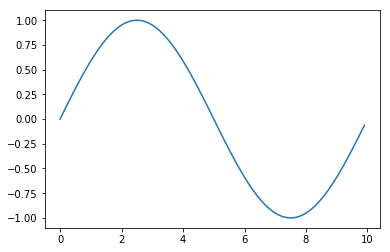

In [10]:
#plt.plot(t,MakeSineData(10,t,0.)) # This is 1/10 per second
#plt.plot(t,MakeSineData(10,t,4))  # Theta is the phase lag
#plt.plot(t,MakeSineData(5,t,0))
print(fs)
print(Ttime)
datasine = np.sin(2.*np.pi/TapT*Ttime)
plt.plot(Ttime,np.sin(2.*np.pi/TapT*Ttime))

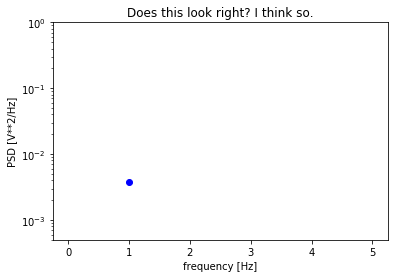

In [12]:
fsine, Pxx_den_sine = signal.welch(datasine, fs, nperseg=10)
plt.semilogy(fsine, Pxx_den_sine, 'bo')
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Does this look right? I think so.')
plt.show()

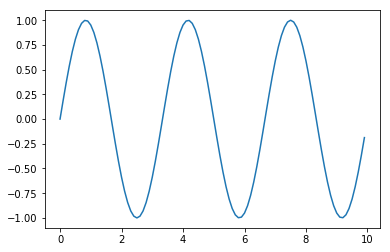

In [13]:
datasine3 = np.sin(2.*np.pi/TapT*3*Ttime)
plt.plot(Ttime,datasine3)

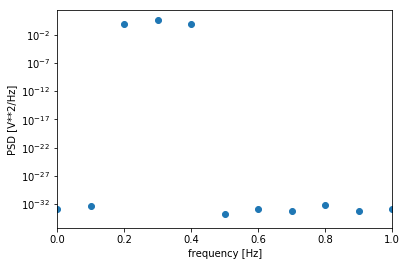

In [14]:
#
# Though this should have a single peak, it has 3 high values.
# Note sure why at the moment -- this is to be explored.
#

fsine3, Pxx_den_sine3 = signal.welch(datasine3, fs, nperseg=100)
plt.semilogy(fsine3, Pxx_den_sine3, 'o')
#plt.ylim([0.5e-3, 1])
plt.xlim(0,1)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

Hmmm. Shouldn't the above plot be EXACLY .333? This must have to do with the windowing.

/Users/wingate/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 100 is greater than input length  = 98, using nperseg = 98
  .format(nperseg, input_length))


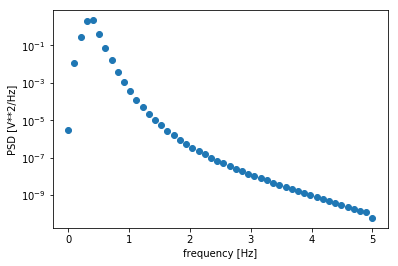

In [15]:

fOsc, Pxx_den_osc = signal.welch(data_osc, fs, nperseg=100)
plt.semilogy(fOsc, Pxx_den_osc, 'o')
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [16]:
omega_t = np.fft.fftfreq(Ns,TapT/Ns)
#kkx       = np.fft.fftfreq(np.int_(Nx),Lx/Nx)*2.*np.pi
print(omega_t)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9 -5.  -4.9 -4.8 -4.7 -4.6 -4.5
 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1
 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1]


In [17]:
spect_sine = np.fft.fft(np.sin(2.*np.pi/10*Ttime))/Ns
fspect_sine6 = np.fft.fft(np.sin(3.*2.*np.pi/10*Ttime))/Ns

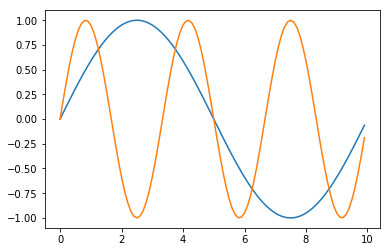

In [18]:
plt.plot(Ttime,np.sin(2.*np.pi/10*Ttime))
plt.plot(Ttime,np.sin(3.*2.*np.pi/10*Ttime))

In [19]:
print(spect_sine)

[ 4.55531587e-18+0.00000000e+00j -3.55271368e-17-5.00000000e-01j
  6.44715430e-18-2.40049578e-17j -2.15335068e-17-5.52525210e-17j
  1.87864850e-18-8.53939282e-18j  1.20465743e-17+5.86768279e-18j
  2.44910964e-19-8.34749633e-18j  1.79470906e-17-5.35552316e-19j
  7.46469850e-18-6.50619928e-18j  1.32795101e-17+2.12212775e-17j
  1.32364516e-17-1.31985605e-18j -4.74530723e-18-2.12157682e-17j
  1.04118939e-17-1.87269360e-18j  7.95642711e-18-7.04706999e-18j
  2.31629861e-18-3.32396984e-18j  2.26168638e-17-2.11080475e-18j
  9.61384557e-18-8.28644951e-18j  4.38995928e-17+7.83361468e-18j
  4.07039087e-17+6.91043535e-19j  7.97575105e-19+4.63491349e-17j
  4.42609753e-18+2.65698626e-17j  2.42840557e-17+8.05720435e-17j
 -3.83667581e-17+5.49906723e-18j -1.95005854e-17+7.28690274e-18j
 -7.28919508e-18-9.16935445e-18j -1.22104963e-17-5.11461109e-18j
 -6.96725423e-18+1.71789578e-18j  1.02220680e-17+5.96450813e-18j
 -7.82114750e-18-4.66578910e-18j  2.14449343e-18+2.63898527e-18j
 -6.62382164e-18+8.157159

Text(0.5, 1.0, 'this looks correct to me, a peak at 1 and 3')

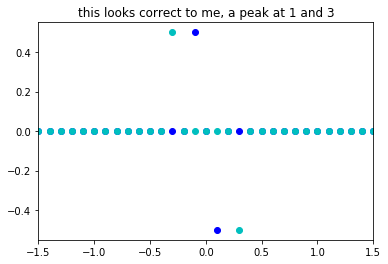

In [29]:
plt.plot(omega_t,np.imag(spect_sine),'bo')
plt.plot(omega_t,np.imag(fspect_sine6),'co')
plt.xlim(-1.5,1.5)
plt.title('this looks correct to me, a peak at 1 and 3')
#plt.plot(np.imag(spect_sine)/N)
#
# Note to self, rescale the frequencies to integers?
#

Now plot the power spectrum

In [21]:
powerspec = spect_sine*np.conjugate(spect_sine)
powerspec6 = fspect_sine6*np.conjugate(fspect_sine6)

(0, 2)

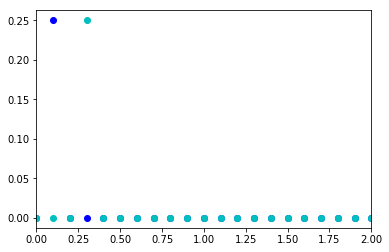

In [30]:
plt.plot(omega_t,powerspec.real, 'bo')
plt.plot(omega_t,powerspec6.real, 'co')
plt.xlim(0,2)

(0, 2)

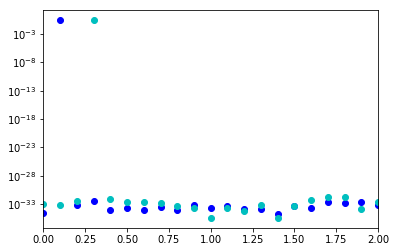

In [36]:
plt.semilogy(omega_t[0:np.int(Ns/2)],powerspec[0:np.int(Ns/2)].real,'bo')
plt.semilogy(omega_t[0:np.int(Ns/2)],powerspec6[0:np.int(Ns/2)].real,'co')
plt.xlim(0,2)

I have seriously got my frequencies wrong on the x axis!

Compare to Welch

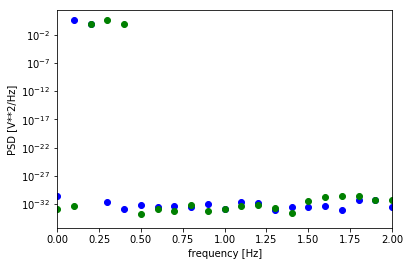

In [40]:
fOsc, Pxx_den_osc = signal.welch(np.sin(2.*np.pi/10*Ttime), fs, nperseg=100)
fOsc6, Pxx_den_osc6 = signal.welch(np.sin(3.*2.*np.pi/10*Ttime), fs, nperseg=100)
plt.semilogy(fOsc, Pxx_den_osc, 'bo')
plt.semilogy(fOsc6, Pxx_den_osc6, 'go')
plt.xlim(0,2)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()